In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [3]:
pip install chardet

Note: you may need to restart the kernel to use updated packages.


In [32]:
import chardet

with open('7.x_commit_1og.csv', 'rb') as file:
    result = chardet.detect(file.read())
    print(result)  # 会返回 {'encoding': '编码类型'}

{'encoding': 'MacRoman', 'confidence': 0.7284491862679818, 'language': ''}


In [50]:
# 设置图形的默认样式
sns.set(style="whitegrid")

df = pd.read_csv('7.x_commit_1og.csv', encoding='MacRoman',usecols=[0,1,2,4,5])

In [51]:
# 显示数据的前几行，检查数据结构
df.head()

,commit_hash,author,commit_date,Unnamed: 4,Unnamed: 5
0,c4a826461b,Tim Abbott,2023/12/15,i18n: Update translation data from Transifex.,NaN
1,e37a734bd7,Alex Vandiver,2023/10/5,"newrelic: ids are uuids, not integers.",The previous fixtures were not generated from ...
2,b7059807ac,Alex Vandiver,2023/11/16,openapi: Use SuccessDescription in new get-str...,This allows it to inherit the required `descri...
3,7fb252a27c,Alex Vandiver,2023/11/16,rest-endpoints: Add new /api/get-stream-email-...,(cherry picked from commit 1af1a6d7e94116000d9...
4,6c4791bb2f,Alex Vandiver,2023/11/16,version: Update version after 7.5 release.,NaN


In [18]:
# 将提交日期列转换为 datetime 类型
df['commit_date'] = pd.to_datetime(df['commit_date'], errors='coerce')

# 检查是否有缺失值
df.isnull().sum()

# 删除含有缺失提交日期的行（如果有的话）
df = df.dropna(subset=['commit_date'])

In [19]:
# 强制将 commit_date 转换为 datetime 类型，并处理无效日期（将无效日期设置为 NaT）
df['commit_date'] = pd.to_datetime(df['commit_date'], errors='coerce')

# 检查是否有空值或无效日期，去除这些行
df = df.dropna(subset=['commit_date'])

# 将 commit_date 列转换为 "Period" 类型的月
df['month'] = df['commit_date'].dt.to_period('M')

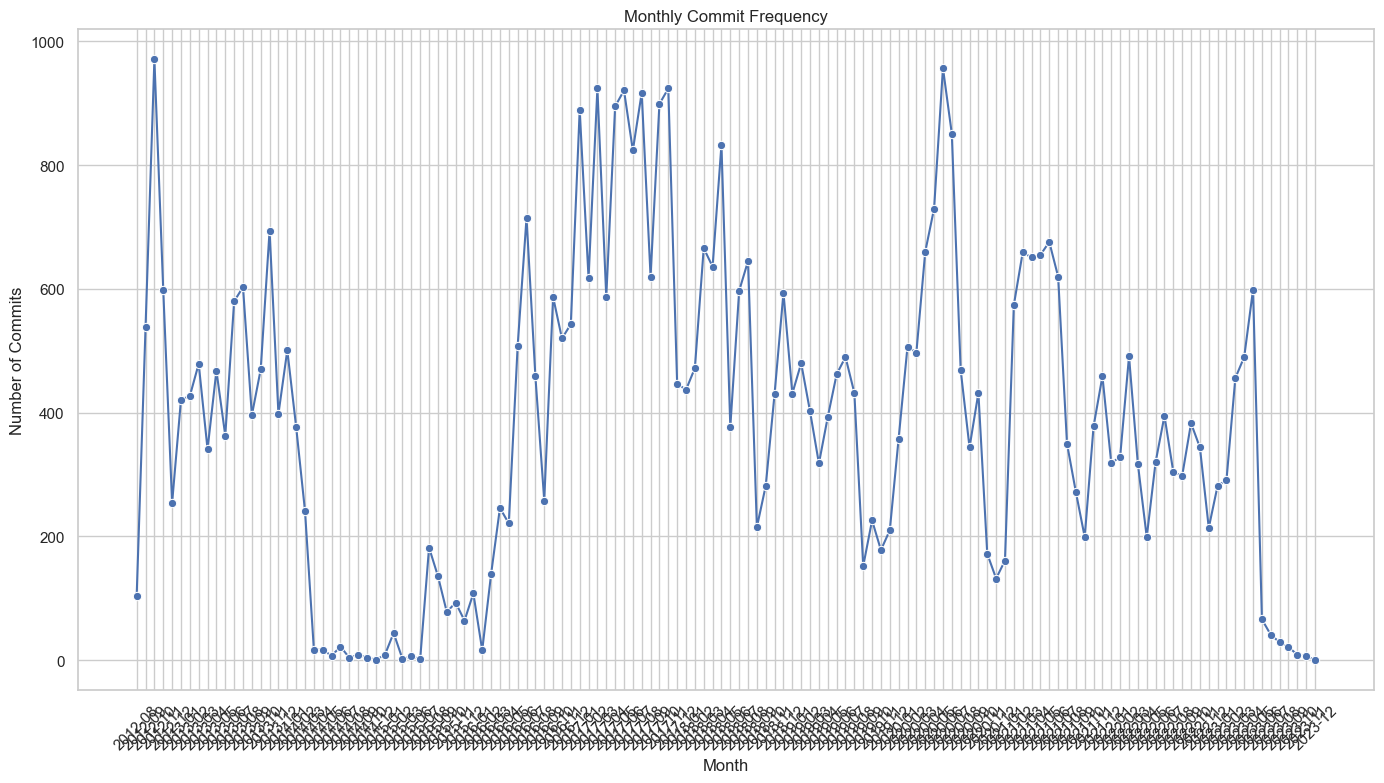

In [20]:
# 转换 'month' 列为字符串类型
df['month_str'] = df['month'].astype(str)

# 按月统计提交次数
monthly_commits = df.groupby('month_str').size().reset_index(name='commit_count')

# 绘制每月提交数量的趋势图
plt.figure(figsize=(14, 8))
sns.lineplot(x='month_str', y='commit_count', data=monthly_commits, marker='o', color='b')
plt.title('Monthly Commit Frequency')
plt.xlabel('Month')
plt.ylabel('Number of Commits')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_24372\2800241233.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='commit_count', y='author', data=author_commit_count.head(20), palette='viridis')


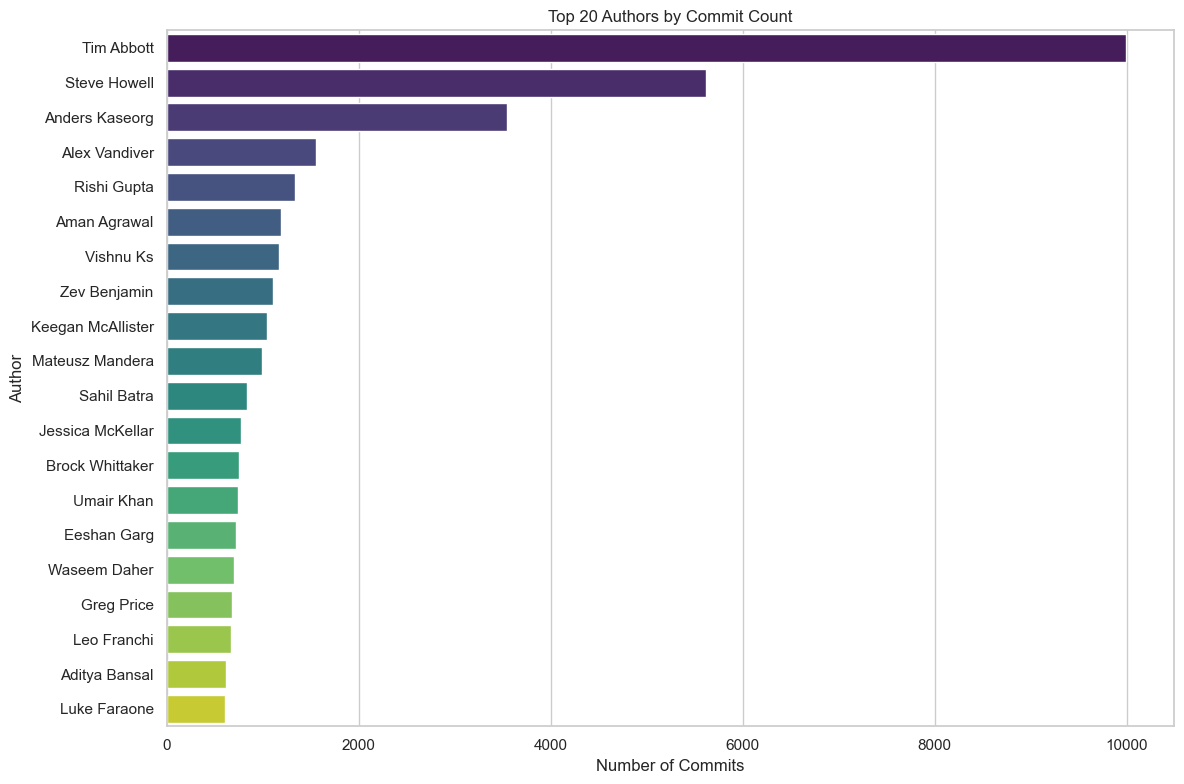

In [21]:
# 按提交者统计提交次数
author_commit_count = df['author'].value_counts().reset_index()
author_commit_count.columns = ['author', 'commit_count']

# 绘制提交者的提交数量柱状图（显示前20名）
plt.figure(figsize=(12, 8))
sns.barplot(x='commit_count', y='author', data=author_commit_count.head(20), palette='viridis')
plt.title('Top 20 Authors by Commit Count')
plt.xlabel('Number of Commits')
plt.ylabel('Author')
plt.tight_layout()
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_24372\1497925101.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='commit_count', y='author', data=author_avg_commits.head(20), palette='plasma')


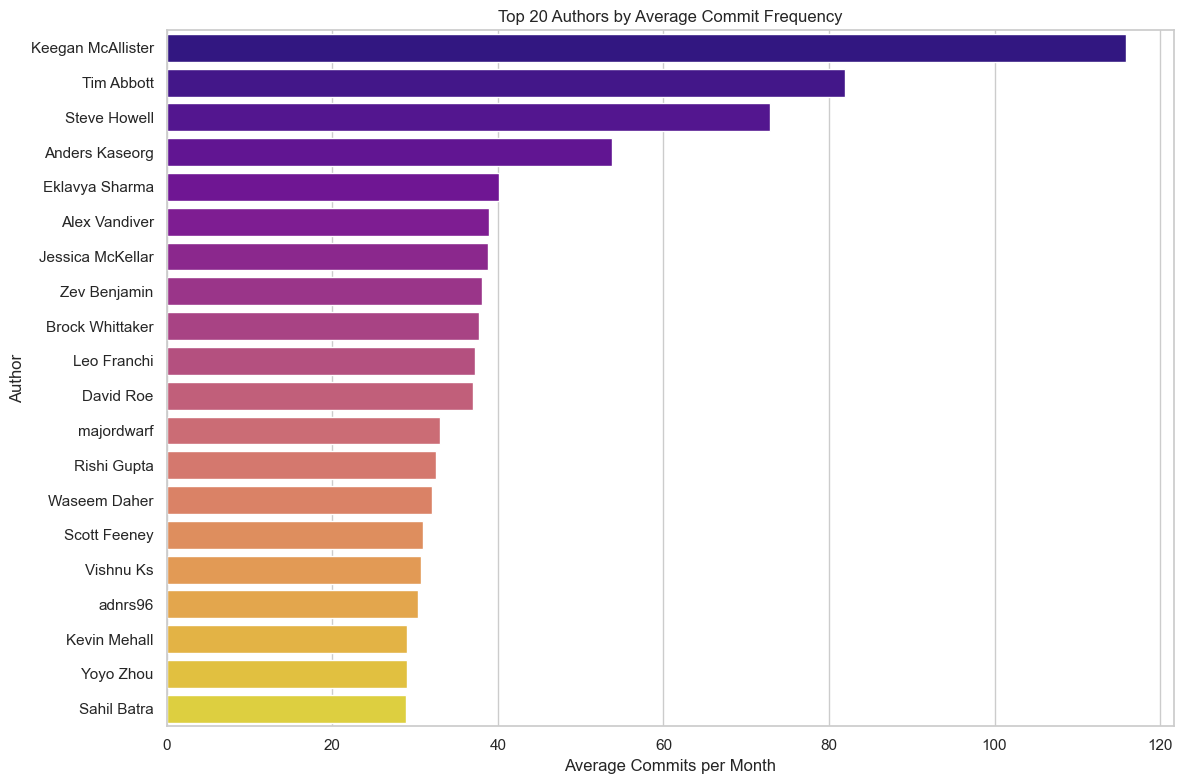

In [22]:
# 计算每位提交者的月度提交数量
df['month'] = df['commit_date'].dt.to_period('M')
author_monthly_commits = df.groupby(['author', 'month']).size().reset_index(name='commit_count')

# 计算每位提交者的平均提交频率
author_avg_commits = author_monthly_commits.groupby('author')['commit_count'].mean().reset_index().sort_values(by='commit_count', ascending=False)

# 绘制每位提交者的平均提交频率柱状图（显示前20名）
plt.figure(figsize=(12, 8))
sns.barplot(x='commit_count', y='author', data=author_avg_commits.head(20), palette='plasma')
plt.title('Top 20 Authors by Average Commit Frequency')
plt.xlabel('Average Commits per Month')
plt.ylabel('Author')
plt.tight_layout()
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_24372\2966247143.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday', y='commit_count', data=weekday_commits, palette='Blues')


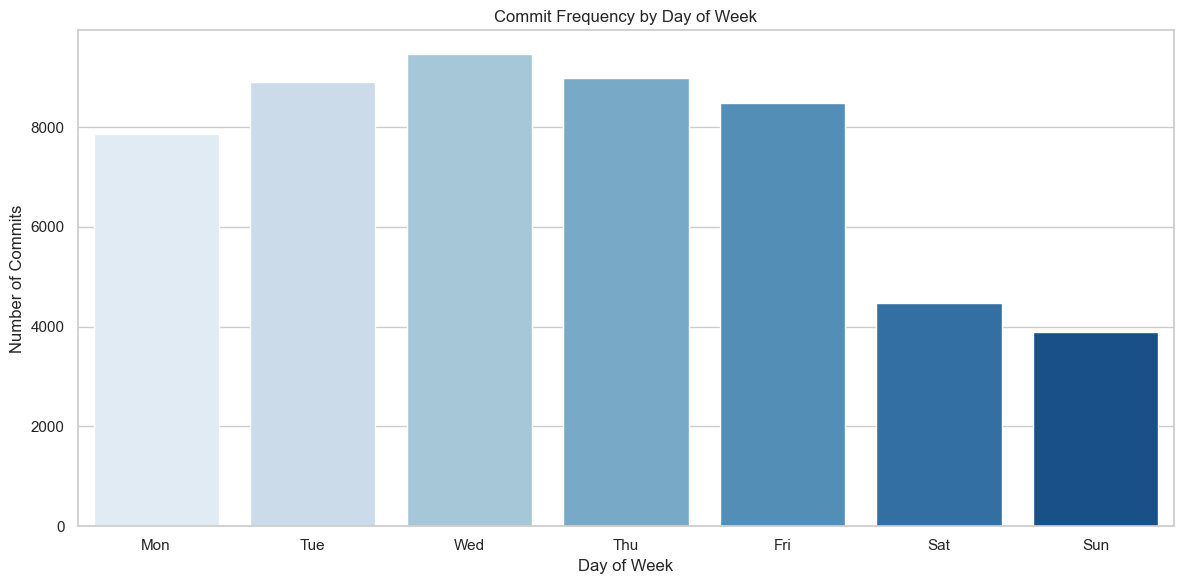

In [23]:
# 提取星期几
df['weekday'] = df['commit_date'].dt.dayofweek

# 按星期几统计提交数量
weekday_commits = df.groupby('weekday').size().reset_index(name='commit_count')

# 绘制按星期几提交数量的柱状图
plt.figure(figsize=(12, 6))
sns.barplot(x='weekday', y='commit_count', data=weekday_commits, palette='Blues')
plt.title('Commit Frequency by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Commits')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.tight_layout()
plt.show()

In [24]:
!pip install wordcloud

  Using cached wordcloud-1.9.4-cp312-cp312-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.4-cp312-cp312-win_amd64.whl (301 kB)



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


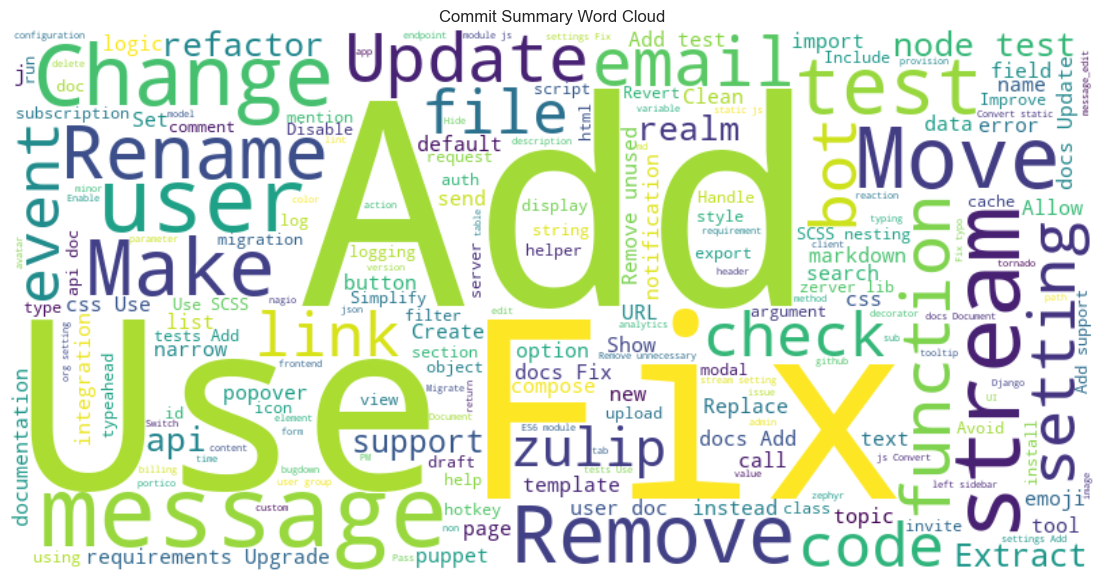

In [36]:
from wordcloud import WordCloud

# 合并所有提交摘要
commit_summary = df['Unnamed: 4'].dropna().str.cat(sep=' ')

# 生成词云
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(commit_summary)

# 显示词云
plt.figure(figsize=(14, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Commit Summary Word Cloud')
plt.show()

In [27]:
print(df.columns)

Index(['commit_hash', 'author', 'commit_date', 'Unnamed: 4', 'Unnamed: 5',
       'month', 'month_str', 'weekday'],
      dtype='object')
